# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
print(f'Se tienen {len(heart_df)} datos.')

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

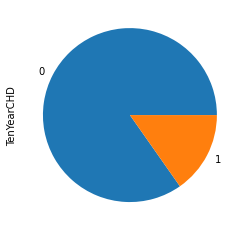

In [5]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [6]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=22)


In [7]:
# Utilice un MinMaxScaler #
scaler = MinMaxScaler()
# Ajuste y Aplique el Escalamiento (función fit_transform) #
x_train =  scaler.fit_transform(x_train)
# Aplique el Escalamiento (función transform) #
x_test = scaler.transform(x_test)


## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [28]:
# Modelo de Regresión Logística #
logreg =  LogisticRegression()
# Entrenamiento sobre los Datos # 
logreg.fit(x_train,y_train) 
# Predicción de Etiquetas #
y_pred = logreg.predict(x_test) 
#Precisión inicial con r^R#
print(f'Precisión inicial: {logreg.score(x_test, y_test)}')

Precisión inicial: 0.836


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Al realizar el score, se obtiene una presición del coeficiente de correlación R^2 de 0.844, lo cual muestra una buena aproximación a lo que se quiere llegar, al ser muy cercano a 1. Sin embargo aún falta por saber cuales son los tipos de resultados y errores obtenidos. Por lo que de ser necesario, este factor puede cambiar e incluso disminuir por el bien de la regresión.


### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

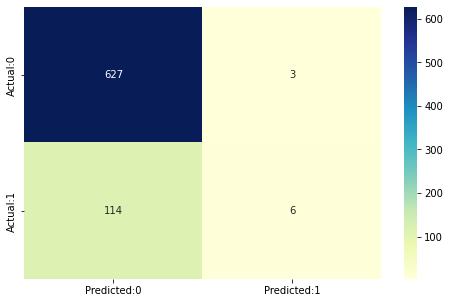

In [9]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [10]:
from sklearn.preprocessing import binarize

# Vector que Contiene los Umbrales a Analizar #

umbrales = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]

for umbral in umbrales:
    cm2 = 0
    # Utilice la función predict_proba para calcular las probabilidades de pertenecer a la clase 1 #
    y_pred_prob_yes = logreg.predict_proba(x_test)
    # Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    y_pred2 = binarize(y_pred_prob_yes, umbral)
    cm2 = confusion_matrix(y_test,y_pred2[:,1])
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos positivos.
Sensitividad: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Especificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')


->Para un umbral de 0.05 tenemos esta matriz de confusión:
[[107 523]
 [  8 112]]
Con 219 predicciones correctas y 8 falsos positivos.
Sensitividad: 0.9333 Especificidad: 0.1698

->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[306 324]
 [ 18 102]]
Con 408 predicciones correctas y 18 falsos positivos.
Sensitividad: 0.85 Especificidad: 0.4857

->Para un umbral de 0.15 tenemos esta matriz de confusión:
[[438 192]
 [ 35  85]]
Con 523 predicciones correctas y 35 falsos positivos.
Sensitividad: 0.7083 Especificidad: 0.6952

->Para un umbral de 0.2 tenemos esta matriz de confusión:
[[512 118]
 [ 63  57]]
Con 569 predicciones correctas y 63 falsos positivos.
Sensitividad: 0.475 Especificidad: 0.8127

->Para un umbral de 0.25 tenemos esta matriz de confusión:
[[545  85]
 [ 75  45]]
Con 590 predicciones correctas y 75 falsos positivos.
Sensitividad: 0.375 Especificidad: 0.8651

->Para un umbral de 0.3 tenemos esta matriz de confusión:
[[583  47]
 [ 94  26]]
Con 609 predicciones corre

Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

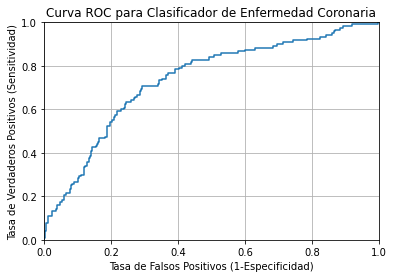

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

Nuestro objetivo es disminuir el error tipo 2, asi sea arriesgando precisión o más error tipo 1. Por lo tanto se busca en este caso que la grafica tenga una inclinación logaritmica hacia un AUC-ROC de 0.75 o más. El caso en que se tenga un modelo perfecto entonces el valor del AUC-ROC sería de 1 y la grafica sería un escalón. Pero entendiendo que se debe permitir un umbral para estos casos, tener un valor mayor a 0.75 indica que se están acercando más datos de los que se fallan.

Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

Precisión modelo actual: 0.788
Precisión modelo actual: 0.7853333333333333
Precisión modelo actual: 0.7853333333333333
Precisión modelo actual: 0.784
Precisión modelo actual: 0.784


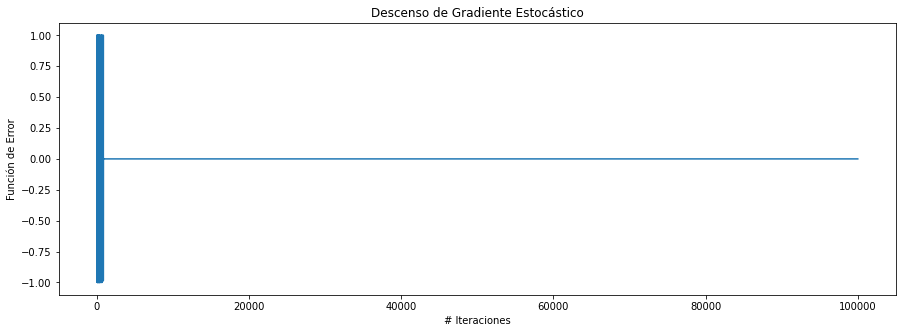

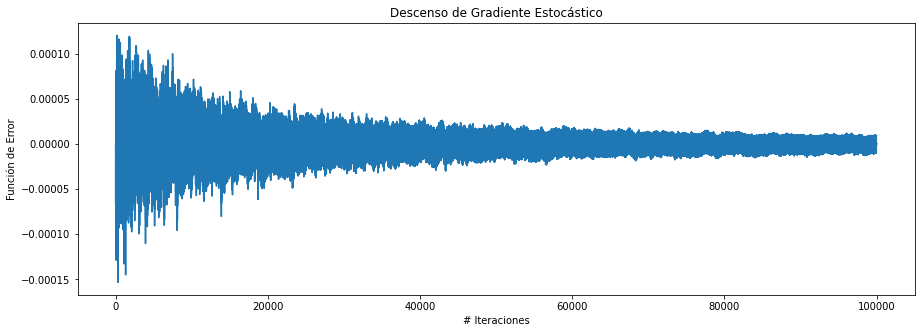

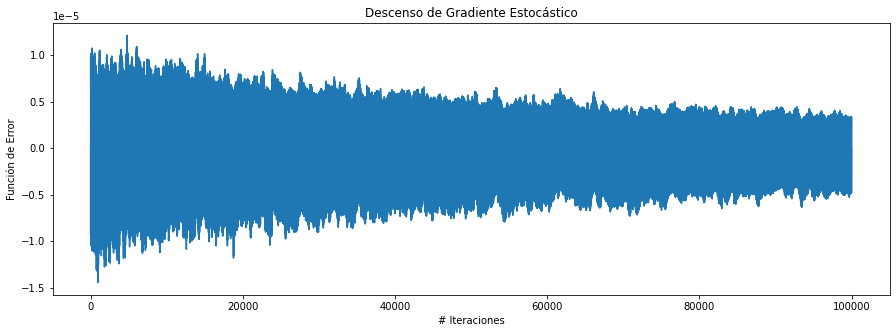

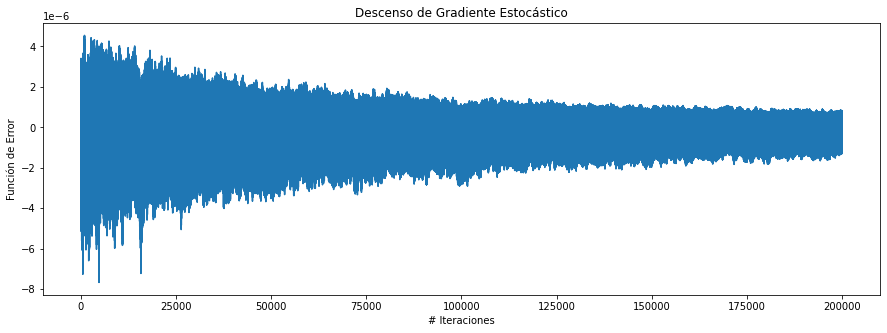

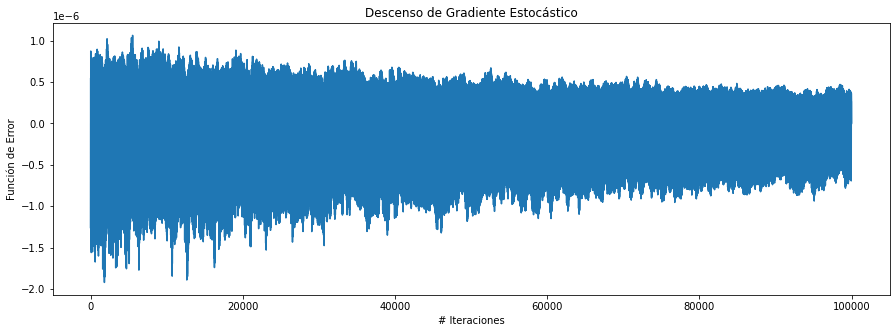

In [33]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=22)
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #
w = np.transpose(w0.copy())

# Se obtiene el número de categorías, que representa la dimensión del vector de pesos W.
N = X_train_array[1].shape[0]
# Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
eps = 1e-5
error = 100
dif = 100
errores = []
def sigma(w,x):
    # Salida de la función sigmoide #
    res_sigmoid = 1 / (1 + np.exp(-w @ x))
    return res_sigmoid

# Defina un vector que contenga las tasas que desea probar #
tasas = [0.001, 0.02, 0.035, 0.1, 0.3]
#tasas = np.linspace(1, 10000, 50, endpoint=True)/10000 
for tasa in tasas:
    dif = 100
    errores = []
    while dif > eps:         # Criterio de parada 1 #
        for j in range (0, 100000):  # Criterio de parada 2 #
            
            # Seleccionar x, y aleatoriamente
            i = int(np.random.rand()*N) # Posición aleatoria #
            xActual = X_train_array[i]
            yActual = y_train_array[i]
            # # Desarrollo de algoritmo # #

            g = sigma(w,xActual)
            e = g - yActual
            wfut = w - (tasa * e * xActual)
            
            # Cálculo de errores
            dif = np.linalg.norm(wfut - w)
            gradE = e * xActual
            error = e
            errores.append(error)

            # Actualizar w
            w = wfut
            
            # # # # # # # # # # # # # # # #

        X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
        y_test_array = y_test.values

        y_pred = np.zeros(len(x_test))

        for i in range(0,len(x_test)):
          prob = sigma(w,X_test_array[i])
          if prob>0.5:
            y_pred[i] = 1
          else:
            y_pred[i] = 0

    print(f'Precisión modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)}')
    plt.figure(figsize=(15,5))
    plt.plot(errores)
    plt.xlabel('# Iteraciones')
    plt.ylabel('Función de Error')
    plt.title('Descenso de Gradiente Estocástico')
    plt.show

## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

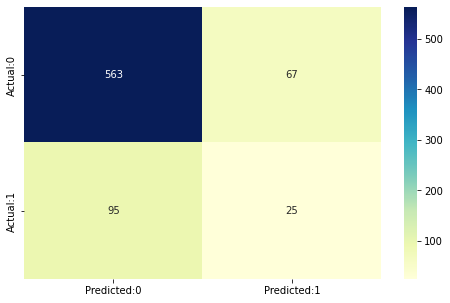

In [34]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

A partir del algoritmo de descenso de gradiente estocástico implementado se logró reducir la cantidad de predicciones que estaban incurriendo en un error tipo 2. Esto significó un incremento en la métrica de sensitividad y una disminución en la de especificidad, teniendo en cuenta la pérdida simultánea de precisión general del modelo (puesto que pasó de una precisión inicial de 0.84 a una con valor de 0.784). Gracias a las condiciones de clasificación, era más conveniente disminuir la cantidad de errores tipo 2 y por eso se buscó la tasa que minimizara de mejor forma dicho criterio, la cual tenía un valor de 0.3. 